## Random Numbers and Probability
In this chapter, you'll learn how to generate random samples and measure chance using probability. You'll work with real-world sales data to calculate the probability of a salesperson being successful. Finally, you’ll use the binomial distribution to model events with binary outcomes.

### Calculating probabilities
You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

Recall that the probability of an event can be calculated by

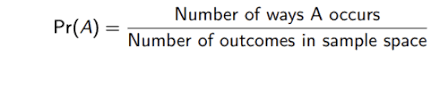

In [2]:
library(dplyr)

sel <- readRDS("seller_1.rds")

head(sel)

sel %>%
# Count the deals for each product
  count(product) %>%
# Calculate probability of picking a deal with each product
  mutate(prob = n/sum(n))


product,client,status,amount,num_users
Product F,Current,Won,7389.52,19
Product C,New,Won,4493.01,43
Product B,New,Won,5738.09,87
Product I,Current,Won,2591.24,83
Product E,Current,Won,6622.97,17
Product B,New,Won,5496.27,2


product,n,prob
Product A,23,0.12921348
Product B,62,0.34831461
Product C,15,0.08426966
Product D,40,0.22471910
Product E,5,0.02808989
Product F,11,0.06179775
Product G,2,0.01123596
Product H,8,0.04494382
Product I,7,0.03932584
Product J,2,0.01123596


### Sampling deals
In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [4]:
# Set random seed to 31
set.seed(31)

# Sample 5 deals without replacement
sel %>%
  sample_n(5)

product,client,status,amount,num_users
Product D,Current,Lost,3086.88,55
Product C,Current,Lost,3727.66,19
Product D,Current,Lost,4274.80,9
Product B,Current,Won,4965.08,9
Product A,Current,Won,5827.35,50


In [5]:
# Sample 5 deals with replacement
sel %>%
  sample_n(5, replace = TRUE)

product,client,status,amount,num_users
Product A,Current,Won,6010.04,24
Product B,Current,Lost,5701.70,53
Product D,Current,Won,6733.62,27
Product F,Current,Won,6780.85,80
Product C,Current,Won,-539.23,11


### Creating a probability distribution
A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups data frame.

Remember that expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

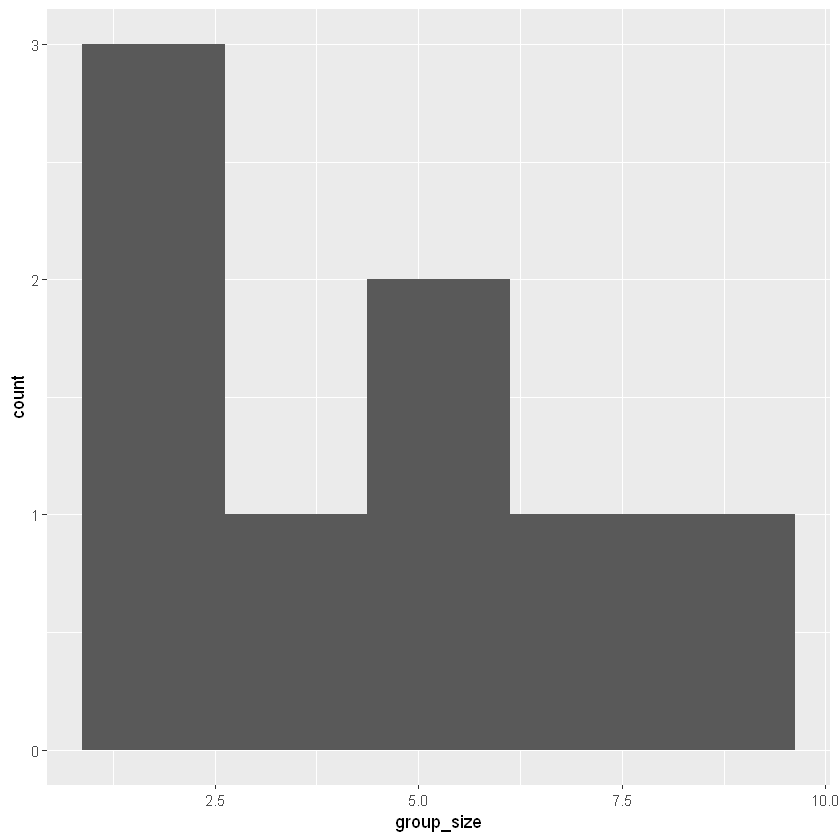

In [8]:
library(ggplot2)
# define restaurant_groups
group_id <- c("A", "B", "C", "D", "E", "F", "G", "H")
group_size <- c(2,3,6,1,2,6,7,8)
restaurant_groups = data.frame(group_id, group_size)
# Create a histogram of group_size
ggplot(restaurant_groups, aes(group_size)) + geom_histogram(bins = 5)

In [10]:
# Create probability distribution
size_distribution <- restaurant_groups %>%
  # Count number of each group size
  count(group_size) %>%
  # Calculate probability
  mutate(probability = n / sum(n))

size_distribution

# Calculate expected group size
expected_val <- sum(size_distribution$group_size *size_distribution$probability)
expected_val

group_size,n,probability
1,1,0.125
2,2,0.250
3,1,0.125
6,2,0.250
7,1,0.125
8,1,0.125


[1] 4.375

In [11]:
# Calculate probability of picking group of 4 or more
size_distribution %>%
  # Filter for groups of 4 or larger
  filter(group_size >= 4) %>%
  # Calculate prob_4_or_more by taking sum of probabilities
  summarize(prob_4_or_more = sum(probability))

prob_4_or_more
0.5


### Data back-ups
The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [12]:
# Min and max wait times for back-up that happens every 30 min
min <- 0
max <- 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 <- punif(5, min, max)
prob_less_than_5

[1] 0.1666667

In [14]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 <- punif(5, min, max, lower.tail = FALSE)
prob_greater_than_5
# or..
prob_greater_than_5_b = 1 - prob_less_than_5
ifelse(prob_greater_than_5_b == prob_greater_than_5, "Y", "N")

[1] 0.8333333

[1] "Y"

In [15]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 <- punif(20, min, max) - punif(10, min, max)
prob_between_10_and_20

[1] 0.3333333

### Simulating wait times
To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

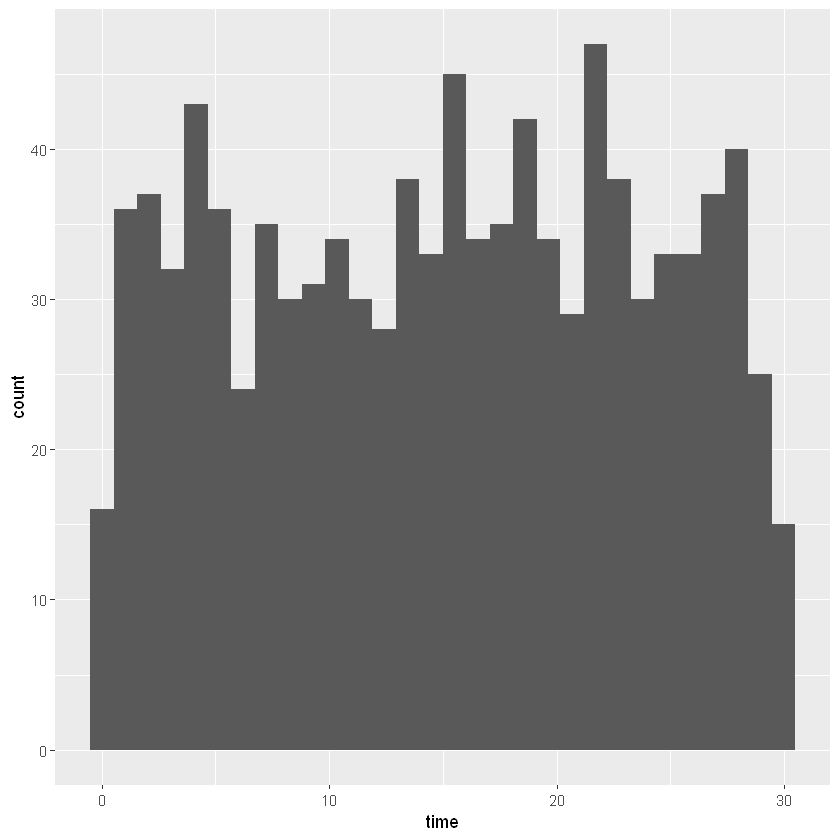

In [17]:
simulation_nb = seq(1, 1000, 1)
wait_times = data.frame(simulation_nb)

# Set random seed to 334
set.seed(334)

# Generate 1000 wait times between 0 and 30 mins, save in time column
wait_times %>%
  mutate(time = runif(1000, min = 0, max = 30)) %>%
  # Create a histogram of simulated times
   ggplot(., aes(time)) + geom_histogram(bins = 30)

### Simulating sales deals
Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [1]:
# Set random seed to 10
set.seed(10)

# Simulate a single deal
rbinom(1, 1, 0.30)


[1] 0

In [2]:
# Set random seed to 10
set.seed(10)

# Simulate 1 week of 3 deals
rbinom(1, 3, 0.30)

[1] 1

In [3]:
# Set random seed to 10
set.seed(10)

# Simulate 52 weeks of 3 deals
deals <- rbinom(52, 3, 0.30)

# Calculate mean deals won per week
mean(deals)

[1] 0.8076923

### Calculating binomial probabilities
Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

In [4]:
# Probability of closing 3 out of 3 deals
dbinom(3,3,0.3)

[1] 0.027

In [5]:
# Probability of closing <= 1 deal out of 3 deals
pbinom(1, 3,0.3)

[1] 0.784

In [6]:
# Probability of closing > 1 deal out of 3 deals    
pbinom(1, 3,0.3, lower.tail = FALSE)


[1] 0.216

### How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. Recall from the video that the expected value of a binomial distribution can be calculated by .

In [7]:
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his X% win rate.

# Expected number won with 30% win rate
won_30pct <- 3 * 0.3
won_30pct

# Expected number won with 25% win rate
won_25pct <- 3*0.25
won_25pct

# Expected number won with 35% win rate
won_35pct <- 3*0.35
won_35pct

[1] 0.9

[1] 0.75

[1] 1.05